<center>
<img src="https://image.aladin.co.kr/product/12609/37/cover500/k372532974_1.jpg" width="200" height="200"><br>
</center>


 - Github: [PinkWink](https://github.com/PinkWink/DataScience)

### 8장 자연어 처리 시작하기

- 한글 자연어 처리기초
- 워드 클라우드
- 육아휴직 관련 법안에 대한 분석
- Naive Bayes Classifier의 이해 - 영문
- Naive Bayes Classifier의 이해 - 한글
- 문장의 유사도 측정하기
- 여자친구 선물 고르기


#### 8-2 한글 자연어 처리 기초



In [84]:
from konlpy.tag import Kkma
kkma = Kkma()

먼저 꼬꼬마 모듈을 사용할 수 있게 한다.

In [85]:
kkma.sentences('한국어 분석을 시작합니다 재미있어요~~')

['한국어 분석을 시작합니다', '재미있어요~~']

그리고 문장(sentences)분석을 한다. ~~시작합니다 재미있어요 ~~ 에서 마침표(.)가 없어도 두 개의 문장으로 구분한다.

In [86]:
kkma.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석']

명사(nouns)분석도 수행합니다.

In [87]:
kkma.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'NNG'),
 ('분석', 'NNG'),
 ('을', 'JKO'),
 ('시작하', 'VV'),
 ('ㅂ니다', 'EFN'),
 ('재미있', 'VA'),
 ('어요', 'EFN'),
 ('~~', 'SW')]

현태소(pos)분석도 수행합니다. 한글은 영어와 달리 단어의 형태 변화가 많아서 영어처럼 쉽게 접근하기 어렵다. 그래서 최소한의 의미 단위인 현태소로 언어를 분석하는 것이 일반적이다.

In [88]:
from konlpy.tag import Hannanum
hannanum = Hannanum()

이번에는 한나눔(Hannanum)을 사용해 보겠다.

In [89]:
hannanum.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '시작']

한나눔의 명사 분석은 꼬꼬마와는 약간 다른 결과를 가져온다.

In [90]:
hannanum.morphs('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '을', '시작', '하', 'ㅂ니다', '재미있', '어요', '~~']

한나눔의 형태소 분석 결과 이다.

In [91]:
hannanum.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'N'),
 ('분석', 'N'),
 ('을', 'J'),
 ('시작', 'N'),
 ('하', 'X'),
 ('ㅂ니다', 'E'),
 ('재미있', 'P'),
 ('어요', 'E'),
 ('~~', 'S')]

이번에는 트위터(Twitter) 분석이다.

In [92]:
from konlpy.tag import Twitter
t = Twitter()

In [93]:
t.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '시작']

In [94]:
t.morphs('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '을', '시작', '합니다', '재미있어요', '~~']

역시 미세한 차이를 가지고 있다.

In [95]:
t.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'Noun'),
 ('분석', 'Noun'),
 ('을', 'Josa'),
 ('시작', 'Noun'),
 ('합니다', 'Verb'),
 ('재미있어요', 'Adjective'),
 ('~~', 'Punctuation')]

### 8-3 워드 클라우드

워드 클라우드(world cloud)는 자주 나타나는 단어를 크게 보여줌으로써 직관적으로 텍스트를 알리는데 도움을 준다. 파이썬에서 사용할 수 있는 워드 클라우드도 몇가지 있습니다만 여기서는 그중 하나를 소개할까 한다. 설치는 이미 8-1절에서 했으니 워드 클라우드 공식 Github에서 배포하는 튜토리얼을 일부 수정한 것을 우리도 튜토리얼하고 다음 절로 넘어가도록 하겠다.

In [96]:
#!pip3 install wordcloud

In [97]:
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image

먼저 필요한 몇몇 모듈을 import 한다. 그리고 이상한 나라의 앨리스 영문 버전을 다운 받아서 data폴더에 저장하고 읽는다. 또한 앨리그 그림도 저장하자.

In [98]:
text = open('./data/09. alice.txt').read()
alice_mask = np.array(Image.open('./data/09. alice_mask.png'))

stopwords = set(STOPWORDS)
stopwords.add("said")

앨리스 소설에는 said 라는 단어가 많이 등장하는 모양이다. 이 단어는 카운트에서 제거하도록 하자.

In [99]:
import matplotlib.pyplot as plt
import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    re('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family = font_name)
else:
    print('Unknown system... sorry~~~~')
        
%matplotlib inline

Unknown system... sorry~~~~


언제나 하는 matplotlib에서 한글 폰트를 설정했다.

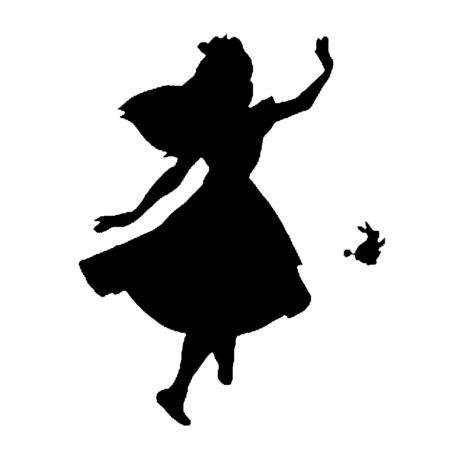

In [100]:
plt.figure(figsize=(8,8))
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

이제 문서 자체에서 단어를 카운트하는 기능을 워드 클라우드가 제공하니 그것을 사용해서 최빈 단어를 찾자.

In [101]:
wc = WordCloud(background_color = 'white', max_words=2000, mask=alice_mask,
              stopwords = stopwords)
wc = wc.generate(text)
wc.words_

{'Alice': 1.0,
 'little': 0.29508196721311475,
 'one': 0.27595628415300544,
 'know': 0.2459016393442623,
 'went': 0.226775956284153,
 'thing': 0.2185792349726776,
 'time': 0.2103825136612022,
 'Queen': 0.20765027322404372,
 'see': 0.1830601092896175,
 'King': 0.17486338797814208,
 'well': 0.1721311475409836,
 'now': 0.16393442622950818,
 'head': 0.16393442622950818,
 'began': 0.15846994535519127,
 'way': 0.1557377049180328,
 'Hatter': 0.1557377049180328,
 'Mock Turtle': 0.15300546448087432,
 'say': 0.15027322404371585,
 'Gryphon': 0.15027322404371585,
 'think': 0.1448087431693989,
 'quite': 0.14207650273224043,
 'much': 0.13934426229508196,
 'first': 0.13934426229508196,
 'thought': 0.1366120218579235,
 'go': 0.1366120218579235,
 'come': 0.13114754098360656,
 'never': 0.1284153005464481,
 'voice': 0.12568306010928962,
 'looked': 0.12295081967213115,
 'got': 0.12295081967213115,
 'must': 0.12021857923497267,
 'Cat': 0.12021857923497267,
 'Duchess': 0.11475409836065574,
 'Mouse': 0.11202

그 결과는 위에 나와있다. Alice가 가장 많이 등장했다. 
- 이제 위에 코드 결과를 엘리스 그림에 겹쳐 보이게 할 것이다.

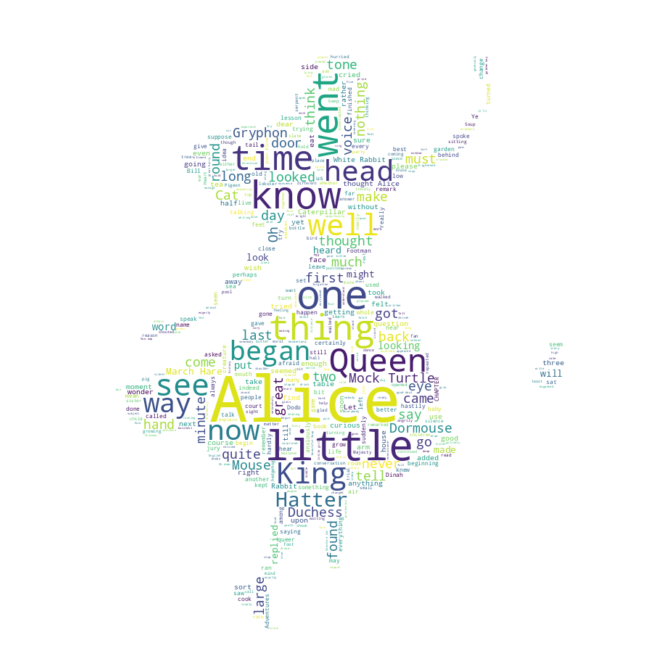

In [102]:
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

뭔가 시각적 효과가 괜찮아 보인다. 그 다음은 스타워즈의 A New Hope 텍스트 이다.

In [103]:
text = open('./data/09. a_new_hope.txt').read()

text = text.replace('HAN', 'Han')
text = text.replace("LUKE'S", 'Luke')

mask = np.array(Image.open('./data/09. stormtrooper_mask.png'))

여기서도 특수하게 처리해야 할 단어를 처리하자.

In [104]:
stopwords = set(STOPWORDS)
stopwords.add("int")
stopwords.add("ext")

그리고 워드 클라우드를 준비하자.

In [105]:
wc = WordCloud(max_words=1000, mask=mask, stopwords=stopwords,
              margin=10, random_state=1).generate(text)

default_colors = wc.to_array()

이번에는 앨리스와는 약간 달리 색상을 전체적으로 회색(grey)으로 채우도록 함수를 하나 만들어 두자.

In [106]:
import random
def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return 'hsl(0,0%%,%d%%)' % random.randint(60, 100)

그리고 그려보자.

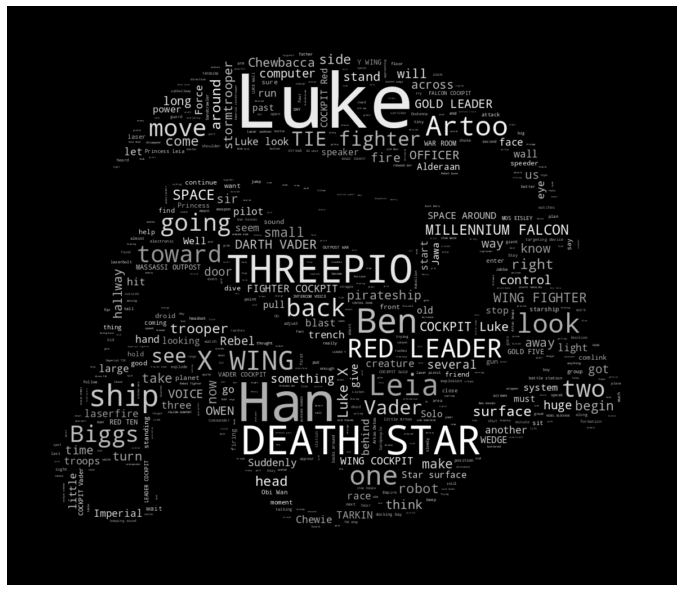

In [107]:
plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
          interpolation='bilinear')
plt.axis('off')
plt.show()

그러면 위와 같이 나타난다. 회색 톤의 색상과 아주 잘 어울리는 것 같다. 문서의 성격과 어울리는 그림에 워드 클라우드를 적용하면 꽤 좋은 효과를 얻을 수 있다.

#### 8-4 육아휴직 관련 법안에 대한 분석

이번에는 Lucy Park 님의 KoNLPy가 내장하고 있는 법률 문서 중 하나를 가지고 기초적인 분석을 해보는 튜토리얼을 아주 미세한 부분 일부를 수정해서 학습하려 한다.

In [108]:
#!pip3 install nltk

In [109]:
import nltk

In [110]:
from konlpy.corpus import kobill
files_ko = kobill.fileids()
doc_ko = kobill.open('1809890.txt').read()

먼저 ultk를 임포트하고 KoNLPy의 내부 문서 중 육하휴직 관련 법안 제 1809890호를 읽는다. 이 법률은 비록 공무원에 한정하고 있지만 육아휴직 대상이 되는 아이의 나이를 만6세에서 만8세로 확장 하는 내용을 담고있다. 

In [111]:
doc_ko

'지방공무원법 일부개정법률안\n\n(정의화의원 대표발의 )\n\n 의 안\n 번 호\n\n9890\n\n발의연월일 : 2010.  11.  12.  \n\n발  의  자 : 정의화․이명수․김을동 \n\n이사철․여상규․안규백\n\n황영철․박영아․김정훈\n\n김학송 의원(10인)\n\n제안이유 및 주요내용\n\n  초등학교 저학년의 경우에도 부모의 따뜻한 사랑과 보살핌이 필요\n\n한 나이이나, 현재 공무원이 자녀를 양육하기 위하여 육아휴직을 할 \n\n수 있는 자녀의 나이는 만 6세 이하로 되어 있어 초등학교 저학년인 \n\n자녀를 돌보기 위해서는 해당 부모님은 일자리를 그만 두어야 하고 \n\n이는 곧 출산의욕을 저하시키는 문제로 이어질 수 있을 것임.\n\n  따라서 육아휴직이 가능한 자녀의 연령을 만 8세 이하로 개정하려\n\n는 것임(안 제63조제2항제4호).\n\n- 1 -\n\n\x0c법률  제        호\n\n지방공무원법 일부개정법률안\n\n지방공무원법 일부를 다음과 같이 개정한다.\n\n제63조제2항제4호 중 “만 6세 이하의 초등학교 취학 전 자녀를”을 “만 \n\n8세 이하(취학 중인 경우에는 초등학교 2학년 이하를 말한다)의 자녀를”\n\n로 한다.\n\n부      칙\n\n이 법은 공포한 날부터 시행한다.\n\n- 3 -\n\n\x0c신 ·구조문대비표\n\n현      행\n\n개   정   안\n\n제63조(휴직) ① (생  략)\n\n제63조(휴직) ① (현행과 같음)\n\n  ② 공무원이 다음 각 호의 어\n\n  ② -------------------------\n\n느 하나에 해당하는 사유로 휴\n\n----------------------------\n\n직을 원하면 임용권자는 휴직\n\n----------------------------\n\n을 명할 수 있다. 다만, 제4호\n\n-------------.---------------\n\n의 경우에는 대통령령으로 정\n\n---------------------------

이 문서를 Twitter 분석기로 명사 분석을 하겠다.

In [112]:
from konlpy.tag import Twitter; t= Twitter()
tokens_ko = t.nouns(doc_ko)
tokens_ko

['지방공무원법',
 '일부',
 '개정',
 '법률',
 '안',
 '정의화',
 '의원',
 '대표',
 '발의',
 '의',
 '안',
 '번',
 '호',
 '발의',
 '연월일',
 '발',
 '의',
 '자',
 '정의화',
 '이명수',
 '김을동',
 '이사철',
 '여상규',
 '안규백',
 '황영철',
 '박영아',
 '김정훈',
 '김학송',
 '의원',
 '인',
 '제안',
 '이유',
 '및',
 '내용',
 '초등학교',
 '저학년',
 '경우',
 '부모',
 '사랑',
 '필요',
 '나이',
 '현재',
 '공무원',
 '자녀',
 '양육',
 '위',
 '육아휴직',
 '수',
 '자녀',
 '나이',
 '만',
 '세',
 '이하',
 '초등학교',
 '저학년',
 '자녀',
 '위',
 '해당',
 '부모님',
 '일자리',
 '곧',
 '출산',
 '의욕',
 '저하',
 '문제',
 '수',
 '것임',
 '따라서',
 '육아휴직',
 '자녀',
 '연령',
 '만',
 '세',
 '이하',
 '개정',
 '것임',
 '안',
 '제',
 '항제',
 '호',
 '법률',
 '제',
 '호',
 '지방공무원법',
 '일부',
 '개정',
 '법률',
 '안',
 '지방공무원법',
 '일부',
 '다음',
 '개정',
 '제',
 '항제',
 '호',
 '중',
 '만',
 '세',
 '이하',
 '초등학교',
 '취학',
 '전',
 '자녀',
 '만',
 '세',
 '이하',
 '취학',
 '중인',
 '경우',
 '초등학교',
 '학년',
 '이하',
 '말',
 '의',
 '자녀',
 '로',
 '부',
 '칙',
 '이',
 '법',
 '공포',
 '날',
 '시행',
 '신',
 '구조',
 '문대비',
 '표',
 '현',
 '행',
 '개',
 '정',
 '안',
 '제',
 '휴직',
 '생',
 '략',
 '제',
 '휴직',
 '현행',
 '공무원',
 '다음',
 '각',
 '호의',
 '느',
 '

그리고 수집된 단어의 횟수(len(ko.tokens))와 고유한 횟수 (len(set(ko.token))) 를 확인한다.

In [113]:
ko = nltk.Text(tokens_ko, name='대한민국 국회 의안 제 1809890호')

In [114]:
print(len(ko.tokens))     #returns number of token (document length)
print(len(set(ko.tokens)))  #return number of unique tokens
ko.vocab()  # return frequency distribution


735
250


FreqDist({'육아휴직': 38, '발생': 19, '만': 18, '이하': 18, '비용': 17, '액': 17, '경우': 16, '세': 16, '자녀': 14, '고용': 14, ...})

In [115]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
    print('Mac version')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
    print('Windows version')
elif platform.system() == 'Linux':
    path = "/usr/share/fonts/NanumFont/NanumGothicBold.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
    print('Linux version')
else:
    print('Unknown system... sorry~~~~')

Linux version


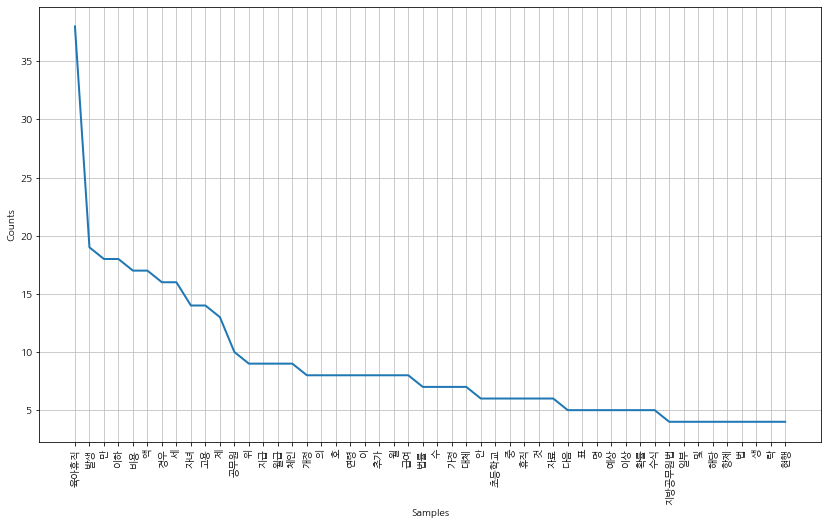

In [116]:
# import matplotlib.pyplot as plt
# import platform

# path = "c:/Windows/Fonts/malgun.ttf"
# from matplotlib import font_manager, rc
# if platform.system() == 'Darwin':
#     re('font', family='AppleGothic')
# elif platform.system() == 'Windows':
#     font_name = font_manager.FontProperties(fname=path).get_name()
#     rc('font', family = font_name)
#     print('Unknown system... sorry~~~~')
# else:
#     print('Unknown system... sorry~~~~')
        
# %matplotlib inline


plt.figure(figsize=(14,8))
ko.plot(50)
plt.show()

많이 등장한 순으로 plot 해볼 수 있다. 당연하겠지만 '육아휴직'이라는 단어가 많이 등장한다. 그런데 약간 의미 없는 단어도 보인다. 한글은 영어와 달리 sropwords를 지정하기 쉽지 않다. 그래서 case-by-case로 지정하겠다

In [117]:
stop_words = ['.','(',')',',',"'",'%','-','X', ').',
              'x','의','자','에','안','번',
              '호','을','이','다','만','로','가','를']
ko = [each_word for each_word in ko if each_word not in stop_words]
ko

['지방공무원법',
 '일부',
 '개정',
 '법률',
 '정의화',
 '의원',
 '대표',
 '발의',
 '발의',
 '연월일',
 '발',
 '정의화',
 '이명수',
 '김을동',
 '이사철',
 '여상규',
 '안규백',
 '황영철',
 '박영아',
 '김정훈',
 '김학송',
 '의원',
 '인',
 '제안',
 '이유',
 '및',
 '내용',
 '초등학교',
 '저학년',
 '경우',
 '부모',
 '사랑',
 '필요',
 '나이',
 '현재',
 '공무원',
 '자녀',
 '양육',
 '위',
 '육아휴직',
 '수',
 '자녀',
 '나이',
 '세',
 '이하',
 '초등학교',
 '저학년',
 '자녀',
 '위',
 '해당',
 '부모님',
 '일자리',
 '곧',
 '출산',
 '의욕',
 '저하',
 '문제',
 '수',
 '것임',
 '따라서',
 '육아휴직',
 '자녀',
 '연령',
 '세',
 '이하',
 '개정',
 '것임',
 '제',
 '항제',
 '법률',
 '제',
 '지방공무원법',
 '일부',
 '개정',
 '법률',
 '지방공무원법',
 '일부',
 '다음',
 '개정',
 '제',
 '항제',
 '중',
 '세',
 '이하',
 '초등학교',
 '취학',
 '전',
 '자녀',
 '세',
 '이하',
 '취학',
 '중인',
 '경우',
 '초등학교',
 '학년',
 '이하',
 '말',
 '자녀',
 '부',
 '칙',
 '법',
 '공포',
 '날',
 '시행',
 '신',
 '구조',
 '문대비',
 '표',
 '현',
 '행',
 '개',
 '정',
 '제',
 '휴직',
 '생',
 '략',
 '제',
 '휴직',
 '현행',
 '공무원',
 '다음',
 '각',
 '호의',
 '느',
 '하나',
 '해당',
 '사유',
 '직',
 '임용',
 '휴직',
 '명',
 '수',
 '다만',
 '제',
 '경우',
 '대통령령',
 '정',
 '사정',
 '직',
 '명',
 '생',
 '략',
 '현

그리고 난 후 다시 그려보겠다.

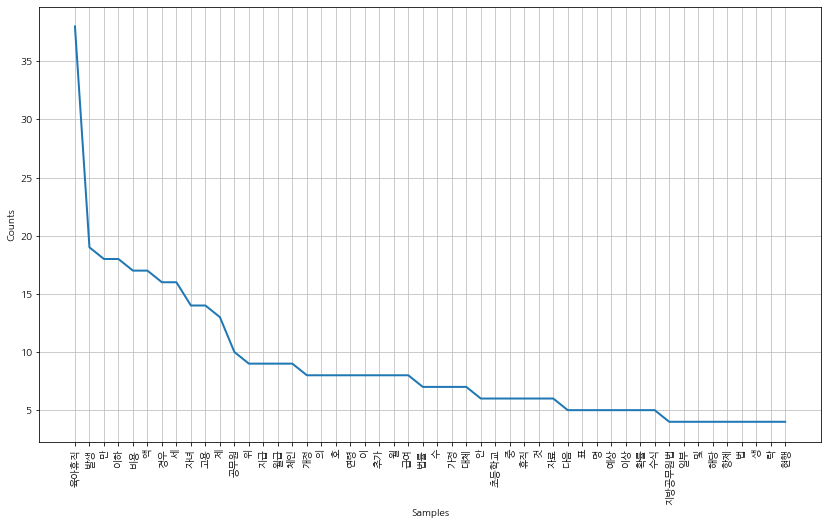

In [118]:
ko = nltk.Text(tokens_ko, name='대한민국 국회 의안 제 1809890호')

plt.figure(figsize=(14,8))
ko.plot(50)
plt.show()

이제 조금 더 좋아 보인다. 좀더 stop_words 변수에 의미 없어 보이는 단어를 추가하면 된다.

In [119]:
ko.count('초등학교')

6

어떤 단어가 문서 내에서 몇 번 언급되었는지 확인할 수 있다.

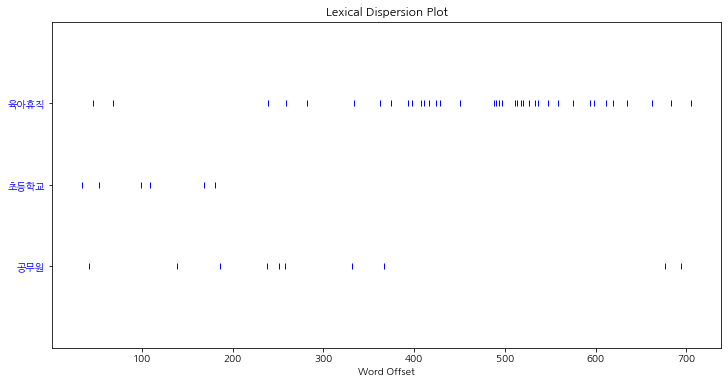

In [120]:
plt.figure(figsize=(12,6))
ko.dispersion_plot(['육아휴직','초등학교','공무원'])

또한 원하는 단어의 문서 내 위치를 개략적으로 그 분량과 함께 알 수 있다.

In [121]:
ko.concordance('초등학교')

Displaying 6 of 6 matches:
 안규백 황영철 박영아 김정훈 김학송 의원 인 제안 이유 및 내용 초등학교 저학년 경우 부모 사랑 필요 나이 현재 공무원 자녀 양육 위 육아
이 현재 공무원 자녀 양육 위 육아휴직 수 자녀 나이 만 세 이하 초등학교 저학년 자녀 위 해당 부모님 일자리 곧 출산 의욕 저하 문제 수 
법률 안 지방공무원법 일부 다음 개정 제 항제 호 중 만 세 이하 초등학교 취학 전 자녀 만 세 이하 취학 중인 경우 초등학교 학년 이하 말
 만 세 이하 초등학교 취학 전 자녀 만 세 이하 취학 중인 경우 초등학교 학년 이하 말 의 자녀 로 부 칙 이 법 공포 날 시행 신 구조 
제 호 의 경우 대통령령 정 사정 직 명 생 략 현행 만 세 이하 초등학교 취 만 세 이하 취학 중인 경우 학 전 자녀 양육 위 초등학교 학
하 초등학교 취 만 세 이하 취학 중인 경우 학 전 자녀 양육 위 초등학교 학년 이하 여 여자 공무원 말 의 자녀 임신 출산 때 생 략 생 


원하는 단어의 주변부 단어까지 같이 확인할 수 있다. 또 문서 내에서 어떤 단어들이 연어(collocation)로 사용되었는지 알 수 있다.

In [122]:
# import nltk
# nltk.download('stopwords')
ko.collocations()

초등학교 저학년; 근로자 육아휴직; 육아휴직 대상자; 공무원 육아휴직
